In [1]:
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Creating the dataset...
- done.
Starting evaluation
- Eval metrics : accuracy: 0.625 ; loss: 1.092


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        325   74   21   99   16   27   22    5   589
1.0         18  352   44   35   10   40   27   11   537
2.0          5   34  386   13    5   37   32   18   530
3.0         27   21    3  462    4    8    8    7   540
4.0         22   83   66   13  276   41   30   22   553
5.0         22   14   16   70    0  392   20    8   542
6.0         23   62   40   99    8   60  230   34   556
7.0          4   69   32   21    5   34   64  321   550
All        446  709  608  812  324  639  433  426  4397


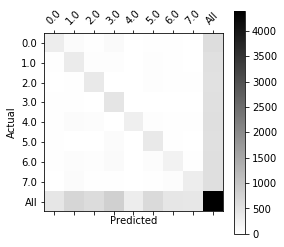

In [2]:
%run evaluate.py

Loading the datasets...
- done.
Starting training for 20 epoch(s)
Restoring parameters from experiments/base_model/best.pth.tar
Epoch 1/20
100%|██████████| 2480/2480 [07:12<00:00,  5.76it/s, loss=0.891]
- Train metrics: accuracy: 0.691 ; loss: 0.874
- Eval metrics : accuracy: 0.572 ; loss: 1.289


Predicted  0.0  1.0  2.0  3.0  4.0   5.0  6.0  7.0   All
Actual                                                  
0.0        404   27    2   15   23    42    4    5   522
1.0         73  274    6   20   46    85   15   21   540
2.0         20   26  159   26   53   183   22   12   501
3.0        104    7    0  380    3    31    1    2   528
4.0         36   30    6    8  353    61    9   16   519
5.0         24   12    3   22    4   424    2    0   491
6.0        119   27    9   55   16   182  136   17   561
7.0         62   13    4   24   16   112   26  258   515
All        842  416  189  550  514  1120  215  331  4177


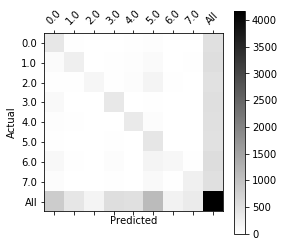

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 2/20
100%|██████████| 2480/2480 [07:14<00:00,  5.76it/s, loss=0.801]
- Train metrics: accuracy: 0.703 ; loss: 0.851
- Eval metrics : accuracy: 0.457 ; loss: 2.482


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0   7.0   All
Actual                                                  
0.0        260   93    4    3   43    1   59    59   522
1.0         13  380   17    4   43    2   18    63   540
2.0          0   54  230    0   36    4   51   126   501
3.0         70   58    1   71    4    1  185   138   528
4.0          6  102   17    2  312    0   20    60   519
5.0         15   61   34    4   15   71  133   158   491
6.0         18  101   19    0   20    0  206   197   561
7.0          4  108    5    0   10    0    9   379   515
All        386  957  327   84  483   79  681  1180  4177


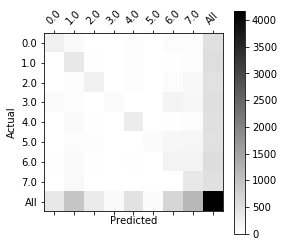

Checkpoint Directory exists! 


Epoch 3/20
100%|██████████| 2480/2480 [07:14<00:00,  5.74it/s, loss=0.698]
- Train metrics: accuracy: 0.736 ; loss: 0.706
- Eval metrics : accuracy: 0.624 ; loss: 1.287


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        385   49    3   20   25    3   17   20   522
1.0         32  366   15   11   44    6   23   43   540
2.0         13   29  288    7   35    8   66   55   501
3.0        114   29    0  331    2    0   22   30   528
4.0         26   61   18    3  343    5   24   39   519
5.0         48   21   15   23   13  241   73   57   491
6.0         89   53   21   22   14    4  238  120   561
7.0         28   37    7    3    8    2   17  413   515
All        735  645  367  420  484  269  480  777  4177


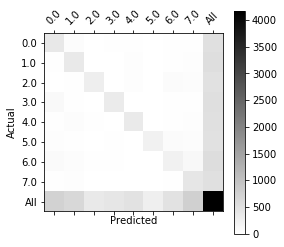

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 4/20
100%|██████████| 2480/2480 [07:14<00:00,  5.75it/s, loss=0.610]
- Train metrics: accuracy: 0.764 ; loss: 0.641
- Eval metrics : accuracy: 0.617 ; loss: 1.490


Predicted  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                  
0.0        363    76    2   28   15    3   22   13   522
1.0         13   442    8    8   26    6   16   21   540
2.0          3    82  235    8   39   15   62   57   501
3.0         52    52    1  375    1    1   33   13   528
4.0         29   100    7    3  317    4   20   39   519
5.0         25    80   12   24   10  221   76   43   491
6.0         56   108   10   21   12    6  248  100   561
7.0         10    93    4    3    6    1   23  375   515
All        551  1033  279  470  426  257  500  661  4177


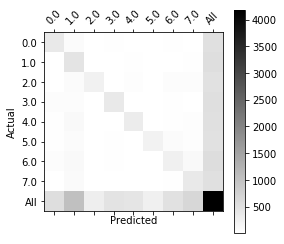

Checkpoint Directory exists! 


Epoch 5/20
100%|██████████| 2480/2480 [07:13<00:00,  5.77it/s, loss=0.533]
- Train metrics: accuracy: 0.816 ; loss: 0.554
- Eval metrics : accuracy: 0.365 ; loss: 5.269


Predicted  0.0  1.0   2.0  3.0   4.0  5.0  6.0  7.0   All
Actual                                                   
0.0        193   19    50    2   189   44   25    0   522
1.0         12  131   103    0   256   26   11    1   540
2.0          0    7   380    0   104    6    4    0   501
3.0         30   29   141   34   114  128   52    0   528
4.0          1    6    30    0   476    3    3    0   519
5.0          5    3   156    1   103  214    9    0   491
6.0         12   12   237    0   195   27   78    0   561
7.0          4   14   253    0   197   16   14   17   515
All        257  221  1350   37  1634  464  196   18  4177


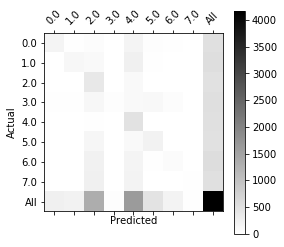

Checkpoint Directory exists! 


Epoch 6/20
100%|██████████| 2480/2480 [07:14<00:00,  5.74it/s, loss=0.473]
- Train metrics: accuracy: 0.821 ; loss: 0.497
- Eval metrics : accuracy: 0.692 ; loss: 0.924


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        409   32    7    9   43    6   12    4   522
1.0         44  350   21   10   68   13   22   12   540
2.0         15   20  344    7   65   12   26   12   501
3.0        113   17    3  353    6   14   17    5   528
4.0         20   24   13    3  441    8    6    4   519
5.0         47   14   17    7   18  355   23   10   491
6.0         95   38   37   14   53   16  267   41   561
7.0         32    8   21    8   40    5   31  370   515
All        775  503  463  411  734  429  404  458  4177


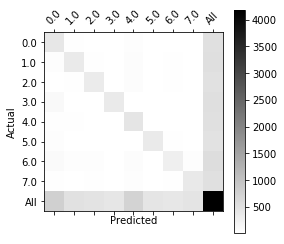

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 7/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.429]
- Train metrics: accuracy: 0.850 ; loss: 0.441
- Eval metrics : accuracy: 0.635 ; loss: 1.539


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        339   12   20   23   56   42   22    8   522
1.0         33  246   82   12   86   28   25   28   540
2.0          2    6  426    1   39   12   12    3   501
3.0         39    9   49  301    7   84   32    7   528
4.0          8    9   33    3  437   11   10    8   519
5.0          8    3   73    6   21  350   25    5   491
6.0         37   16  135   11   46   56  228   32   561
7.0         13    6   72    3   31   18   47  325   515
All        479  307  890  360  723  601  401  416  4177


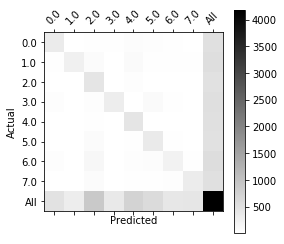

Checkpoint Directory exists! 


Epoch 8/20
100%|██████████| 2480/2480 [07:13<00:00,  5.75it/s, loss=0.390]
- Train metrics: accuracy: 0.871 ; loss: 0.354
- Eval metrics : accuracy: 0.557 ; loss: 2.854


Predicted  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                  
0.0        237   139    1   84    6   38   13    4   522
1.0          7   454    5   21   10   30   13    0   540
2.0          1   120  183   43   10  101   37    6   501
3.0         11    39    1  452    0   14    9    2   528
4.0         20   165    4   15  241   43   18   13   519
5.0          7    45    1   28    1  400    7    2   491
6.0         17   154   12   93    3   95  177   10   561
7.0         10   217    5   36    1   34   30  182   515
All        310  1333  212  772  272  755  304  219  4177


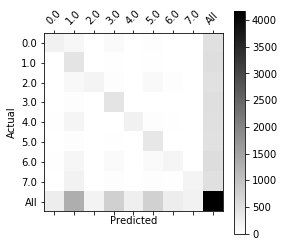

Checkpoint Directory exists! 


Epoch 9/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.663]
- Train metrics: accuracy: 0.786 ; loss: 0.591
- Eval metrics : accuracy: 0.503 ; loss: 2.551


Predicted  0.0  1.0   2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                  
0.0        269   17    83   21   70   32   20   10   522
1.0         15  175   192    7   62   39   22   28   540
2.0          0    1   483    0    7    8    2    0   501
3.0         23   10   125  237   14   92   24    3   528
4.0          4    7   116    2  369   13    5    3   519
5.0          4    1   159    7   12  299    8    1   491
6.0         23    8   327    6   33   47  108    9   561
7.0          2    3   293    1   23   21   14  158   515
All        340  222  1778  281  590  551  203  212  4177


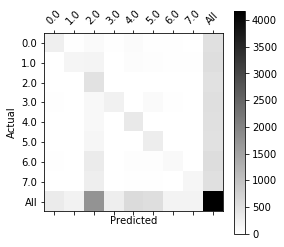

Checkpoint Directory exists! 


Epoch 10/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.608]
- Train metrics: accuracy: 0.786 ; loss: 0.596
- Eval metrics : accuracy: 0.700 ; loss: 0.953


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        395   16    6   13   61    9   15    7   522
1.0         48  299   33   10   94    9   26   21   540
2.0          5   10  368    5   68   10   24   11   501
3.0         68    5    5  398   15   14   11   12   528
4.0         21   12   11    1  453    5    7    9   519
5.0         26    4   28   12   25  346   33   17   491
6.0         70   19   45   18   64   16  266   63   561
7.0         22    9   16    2   34    4   29  399   515
All        655  374  512  459  814  413  411  539  4177


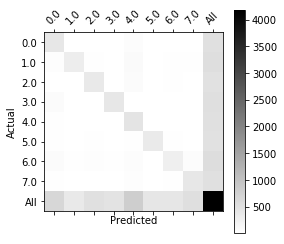

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 11/20
100%|██████████| 2480/2480 [07:13<00:00,  5.79it/s, loss=0.577]
- Train metrics: accuracy: 0.754 ; loss: 0.678
- Eval metrics : accuracy: 0.645 ; loss: 1.154


Predicted   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                  
0.0         454   25    2    3   30    4    3    1   522
1.0          57  387   12   10   45   17    5    7   540
2.0          33   32  284   19   67   36   22    8   501
3.0         150   24    1  319    2   19   10    3   528
4.0          63   36   11    1  383   12    8    5   519
5.0          61   24    6   16   13  355   13    3   491
6.0         150   59   27   20   25   33  214   33   561
7.0          91   44    9    7   18   18   29  299   515
All        1059  631  352  395  583  494  304  359  4177


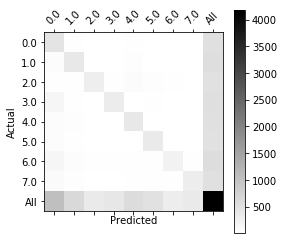

Checkpoint Directory exists! 


Epoch 12/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.545]
- Train metrics: accuracy: 0.819 ; loss: 0.510
- Eval metrics : accuracy: 0.694 ; loss: 0.931


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        373   19   15   47   19   31   14    4   522
1.0         32  314   35   38   42   38   31   10   540
2.0          6    8  359   25   25   40   34    4   501
3.0         30    7    3  460    3   16    8    1   528
4.0         22   12   20   12  406   25   17    5   519
5.0         11    8   15   27    6  408   13    3   491
6.0         56   22   37   62   16   57  290   21   561
7.0         33   11   29   35   19   46   53  289   515
All        563  401  513  706  536  661  460  337  4177


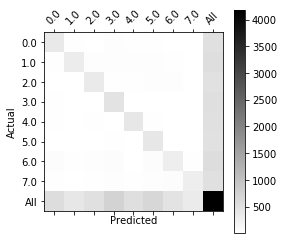

Checkpoint Directory exists! 


Epoch 13/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.525]
- Train metrics: accuracy: 0.820 ; loss: 0.538
- Eval metrics : accuracy: 0.590 ; loss: 2.591


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        416   51    1   14   14    4   16    6   522
1.0         46  406    7    7   28   10   17   19   540
2.0         22   61  176   15   44   24  117   42   501
3.0        138   37    0  317    1    3   28    4   528
4.0         45   87    2    4  321   10   31   19   519
5.0         58   40    5   22    8  276   70   12   491
6.0        115   73    2   21   11   17  281   41   561
7.0         70   87    2    4    6    5   68  273   515
All        910  842  195  404  433  349  628  416  4177


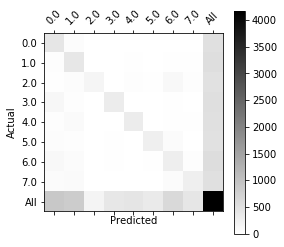

Checkpoint Directory exists! 


Epoch 14/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.500]
- Train metrics: accuracy: 0.844 ; loss: 0.467
- Eval metrics : accuracy: 0.711 ; loss: 0.869


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        430   49    4    8   12    8    8    3   522
1.0         27  427   12   11   24   14   14   11   540
2.0         13   39  299   13   31   43   37   26   501
3.0         49   29    0  426    0    3   18    3   528
4.0         30   51    7    2  374   12   22   21   519
5.0         31   36    6   22    2  366   15   13   491
6.0         78   69   21   28   11   32  271   51   561
7.0         29   44    6   11    5   14   29  377   515
All        687  744  355  521  459  492  414  505  4177


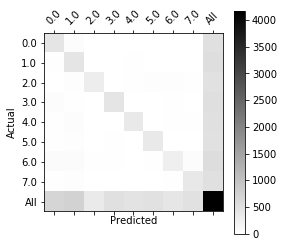

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 15/20
100%|██████████| 2480/2480 [07:13<00:00,  5.75it/s, loss=0.477]
- Train metrics: accuracy: 0.835 ; loss: 0.479
- Eval metrics : accuracy: 0.731 ; loss: 0.842


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        417   46    2   16   20    6   11    4   522
1.0         22  423   11   15   29    5   24   11   540
2.0          7   48  311   13   42   27   33   20   501
3.0         39   27    1  439    2    1   13    6   528
4.0         35   47   10    4  397    6   11    9   519
5.0         30   29    9   22    4  369   19    9   491
6.0         70   58   19   33   13   13  305   50   561
7.0         31   24   10   11   11    7   28  393   515
All        651  702  373  553  518  434  444  502  4177


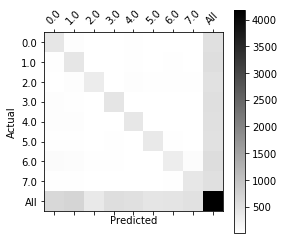

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 16/20
100%|██████████| 2480/2480 [07:13<00:00,  5.74it/s, loss=0.458]
- Train metrics: accuracy: 0.854 ; loss: 0.427
- Eval metrics : accuracy: 0.726 ; loss: 0.953


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        393   30   14   21   18   22   16    8   522
1.0         31  371   39   14   27   25   12   21   540
2.0          3   13  409   10   17   28   11   10   501
3.0         38   12   10  429    0   27    8    4   528
4.0         18   28   34    4  385   20   13   17   519
5.0         13   11   19   14    2  422    7    3   491
6.0         61   35   61   32   15   65  236   56   561
7.0         28   13   31    8    6   25   15  389   515
All        585  513  617  532  470  634  318  508  4177


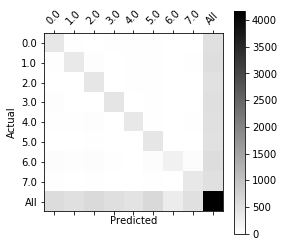

Checkpoint Directory exists! 


Epoch 17/20
100%|██████████| 2480/2480 [07:13<00:00,  5.77it/s, loss=0.437]
- Train metrics: accuracy: 0.846 ; loss: 0.440
- Eval metrics : accuracy: 0.552 ; loss: 2.356


Predicted  0.0  1.0  2.0  3.0  4.0   5.0  6.0  7.0   All
Actual                                                  
0.0        374   12   13   17   53    47    6    0   522
1.0         68  203   51   12  121    73    9    3   540
2.0          8    9  377    5   60    35    7    0   501
3.0         49    3    7  321   12   131    5    0   528
4.0         25   11   25    2  423    29    4    0   519
5.0         16    7   23   10   16   413    5    1   491
6.0         61   24   85   20   72   179  120    0   561
7.0         62   12   93   10   69   178   15   76   515
All        663  281  674  397  826  1085  171   80  4177


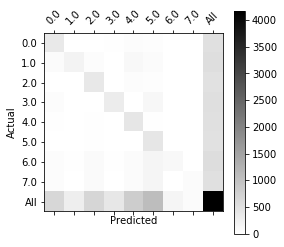

Checkpoint Directory exists! 


Epoch 18/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.425]
- Train metrics: accuracy: 0.854 ; loss: 0.415
- Eval metrics : accuracy: 0.737 ; loss: 0.982


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        389   23   14   27   25    9   23   12   522
1.0         23  351   37   13   36    5   40   35   540
2.0          4    9  395    5   20    7   42   19   501
3.0         36    9    6  422    4    9   32   10   528
4.0         16   30   27    5  400    7   19   15   519
5.0         23    9   33   15   11  326   51   23   491
6.0         37   28   35   17   17   10  361   56   561
7.0         12    4   17    2   10    2   35  433   515
All        540  463  564  506  523  375  603  603  4177


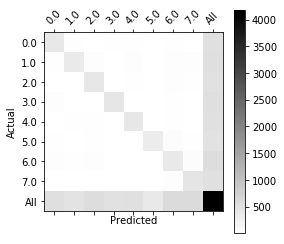

Checkpoint Directory exists! 


- Found new best accuracy
Epoch 19/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.425]
- Train metrics: accuracy: 0.838 ; loss: 0.448
- Eval metrics : accuracy: 0.708 ; loss: 1.035


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        413   17    8   29   18   11   22    4   522
1.0         54  317   28   20   33   18   38   32   540
2.0         11    4  364   19   18   20   39   26   501
3.0         62    2    5  442    1    6    6    4   528
4.0         33   18   27    5  362   12   37   25   519
5.0         29    7   21   29    9  355   30   11   491
6.0         70   14   27   32    8   30  330   50   561
7.0         34    1   17   19    7    7   56  374   515
All        706  380  497  595  456  459  558  526  4177


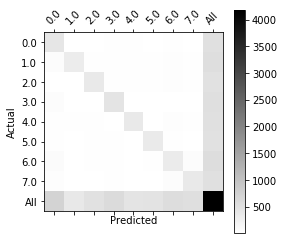

Checkpoint Directory exists! 


Epoch 20/20
100%|██████████| 2480/2480 [07:13<00:00,  5.76it/s, loss=0.400]
- Train metrics: accuracy: 0.868 ; loss: 0.431
- Eval metrics : accuracy: 0.739 ; loss: 0.899


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        380   34    8   35   21   23   18    3   522
1.0         25  371   30   15   35   21   25   18   540
2.0          4    9  391   11   27   31   22    6   501
3.0         25    7    6  447    2   26    9    6   528
4.0         15   22   15    5  418   20   12   12   519
5.0         13    8   18   13    7  419    9    4   491
6.0         41   30   38   53   23   60  287   29   561
7.0         17    1   27   20   15   23   38  374   515
All        520  482  533  599  548  623  420  452  4177


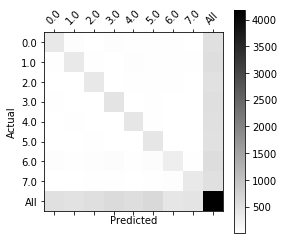

Checkpoint Directory exists! 


- Found new best accuracy


In [3]:
%run train.py --restore_file best

Creating the dataset...
- done.
Starting evaluation
- Eval metrics : accuracy: 0.747 ; loss: 0.924


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        432   26    4   44   24   33   18    8   589
1.0         21  385   15   21   27   33   18   17   537
2.0          8   17  419   13   23   25   15   10   530
3.0         30    7    1  461    8   22    7    4   540
4.0         17   21   16    4  449   19   10   17   553
5.0         16    8   21   19    3  467    6    2   542
6.0         32   29   38   54   19   68  294   22   556
7.0          6   25   27   16   17   39   44  376   550
All        562  518  541  632  570  706  412  456  4397


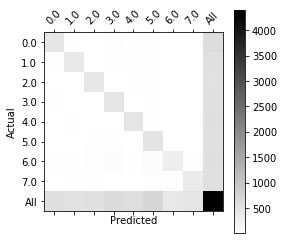

In [4]:
%run evaluate.py